## clustering :k-means
# FILTEREDKENYASCREENS have all the data till date may-15-2024


In [ ]:
print("hi")

hi


In [ ]:
import pandas as pd
df=pd.read_csv("/content/FILTEREDKENYASCREENS_CSV-2.csv")

In [ ]:
print(df.shape)
df.info()

(280676, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280676 entries, 0 to 280675
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customUser:user_Id      280676 non-null  int64  
 1   date                    280676 non-null  object 
 2   unifiedScreenName       280676 non-null  object 
 3   screenPageViews         280676 non-null  int64  
 4   totalUsers              280676 non-null  int64  
 5   screenPageViewsPerUser  280676 non-null  float64
 6   userEngagementDuration  280676 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 15.0+ MB


In [ ]:
purchased_users = df[df['unifiedScreenName'] == '/ChoosePayment']['customUser:user_Id'].unique()
purchased_users

array([722824213, 720309079, 729572754, ..., 790666646, 754503284,
       728913426])

In [ ]:
grouped = df.groupby(['customUser:user_Id', 'date'])['unifiedScreenName'].apply(list).reset_index()
grouped

,customUser:user_Id,date,unifiedScreenName
0,100117465,11-01-2024,"[/ProductListing, /DashboardScreen, /ProductDe..."
1,100117465,28-01-2024,"[/DashboardScreen, /CartScreen]"
2,100122192,02-05-2024,[/DashboardScreen]
3,100122192,03-05-2024,"[/DashboardScreen, /LoginScreen]"
4,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,..."
...,...,...,...
79722,799986373,15-03-2024,"[/DashboardScreen, /ProductDetails, /ProductLi..."
79723,799986373,18-02-2024,"[/DashboardScreen, /LoginScreen, /ProductDetai..."
79724,799987903,23-03-2024,"[/DashboardScreen, /ProductListing, /CartScree..."
79725,799987903,25-01-2024,"[/ProductDetails, /ProductListing, /CartScreen..."


In [ ]:
grouped = df.groupby(['customUser:user_Id', 'date']).agg({
    'unifiedScreenName': list,
    'userEngagementDuration': list
}).reset_index()
grouped

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration
0,100117465,11-01-2024,"[/ProductListing, /DashboardScreen, /ProductDe...","[154, 27, 38]"
1,100117465,28-01-2024,"[/DashboardScreen, /CartScreen]","[9, 2]"
2,100122192,02-05-2024,[/DashboardScreen],[15]
3,100122192,03-05-2024,"[/DashboardScreen, /LoginScreen]","[10, 11]"
4,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]"
...,...,...,...,...
79722,799986373,15-03-2024,"[/DashboardScreen, /ProductDetails, /ProductLi...","[103, 53, 39, 103, 53, 39]"
79723,799986373,18-02-2024,"[/DashboardScreen, /LoginScreen, /ProductDetai...","[89, 6, 8, 4]"
79724,799987903,23-03-2024,"[/DashboardScreen, /ProductListing, /CartScree...","[45, 11, 63, 6]"
79725,799987903,25-01-2024,"[/ProductDetails, /ProductListing, /CartScreen...","[35, 16, 54, 0]"


In [ ]:
# Assuming grouped_df is the result of your code
number_of_unique_user_ids = grouped['customUser:user_Id'].nunique()
print("Number of Unique User IDs:", number_of_unique_user_ids)


Number of Unique User IDs: 27498


In [ ]:
grouped['purchased'] = grouped['unifiedScreenName'].apply(lambda screens: '/ChoosePayment' in screens)
purchased_users = grouped[grouped['purchased']]['customUser:user_Id'].unique()
purchased_users
print(len(purchased_users))

17227


In [ ]:
purchased_df = df[df['customUser:user_Id'].isin(purchased_users)]
non_purchased_df = df[~df['customUser:user_Id'].isin(purchased_users)]

In [ ]:
purchased_df
purchased_users = purchased_df.groupby(['customUser:user_Id', 'date']).agg({
    'unifiedScreenName': list,
    'userEngagementDuration': list
}).reset_index()
purchased_users

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]"
1,100148598,14-12-2023,"[/DashboardScreen, /LoginScreen]","[19, 17]"
2,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 3, 39]"
3,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /ChoosePayment, /D...","[9, 8, 9, 1, 22, 5]"
4,100176402,04-12-2023,"[/CartScreen, /ChoosePayment, /DashboardScreen]","[20, 446, 20]"
...,...,...,...,...
59255,799973483,19-11-2023,"[/DashboardScreen, /ChoosePayment, /CartScreen...","[475, 148, 38, 33, 2]"
59256,799973483,24-01-2024,"[/DashboardScreen, /CartScreen, /ChoosePayment...","[275, 70, 43, 4, 5]"
59257,799973483,24-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[477, 14, 4, 4, 68]"
59258,799973549,10-04-2024,"[/CartScreen, /DashboardScreen, /ChoosePayment...","[40, 20, 29, 18]"


In [ ]:
non_purchased_df
non_purchased_users = non_purchased_df.groupby(['customUser:user_Id', 'date']).agg({
    'unifiedScreenName': list,
    'userEngagementDuration': list
}).reset_index()
non_purchased_users

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration
0,100117465,11-01-2024,"[/ProductListing, /DashboardScreen, /ProductDe...","[154, 27, 38]"
1,100117465,28-01-2024,"[/DashboardScreen, /CartScreen]","[9, 2]"
2,100122192,02-05-2024,[/DashboardScreen],[15]
3,100122192,03-05-2024,"[/DashboardScreen, /LoginScreen]","[10, 11]"
4,100376756,01-02-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[42, 62, 3, 1]"
...,...,...,...,...
20462,799986373,15-03-2024,"[/DashboardScreen, /ProductDetails, /ProductLi...","[103, 53, 39, 103, 53, 39]"
20463,799986373,18-02-2024,"[/DashboardScreen, /LoginScreen, /ProductDetai...","[89, 6, 8, 4]"
20464,799987903,23-03-2024,"[/DashboardScreen, /ProductListing, /CartScree...","[45, 11, 63, 6]"
20465,799987903,25-01-2024,"[/ProductDetails, /ProductListing, /CartScreen...","[35, 16, 54, 0]"


In [ ]:
import pandas as pd
purchased_users_df = pd.DataFrame(purchased_users)
purchased_users_df.to_csv('purchased_users1.csv', index=False)
non_purchased_users_df = pd.DataFrame(non_purchased_users)
non_purchased_users_df.to_csv('non_purchased_users.csv', index=False)


In [ ]:
def get_choose_payment_count_and_update_df(df):
    df['choosePaymentCount'] = df['unifiedScreenName'].apply(
        lambda screens: sum(1 for screen in screens if screen == "/ChoosePayment"))

    return df
purchased_users_df = get_choose_payment_count_and_update_df(purchased_users_df)

In [ ]:
purchased_users_df

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]",1
1,100148598,14-12-2023,"[/DashboardScreen, /LoginScreen]","[19, 17]",0
2,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 3, 39]",1
3,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /ChoosePayment, /D...","[9, 8, 9, 1, 22, 5]",1
4,100176402,04-12-2023,"[/CartScreen, /ChoosePayment, /DashboardScreen]","[20, 446, 20]",1
...,...,...,...,...,...
59255,799973483,19-11-2023,"[/DashboardScreen, /ChoosePayment, /CartScreen...","[475, 148, 38, 33, 2]",1
59256,799973483,24-01-2024,"[/DashboardScreen, /CartScreen, /ChoosePayment...","[275, 70, 43, 4, 5]",1
59257,799973483,24-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[477, 14, 4, 4, 68]",1
59258,799973549,10-04-2024,"[/CartScreen, /DashboardScreen, /ChoosePayment...","[40, 20, 29, 18]",1


In [ ]:
# Aggregate counts by user
choose_payment_counts = purchased_users_df.groupby('customUser:user_Id')['choosePaymentCount'].sum().reset_index()
choose_payment_counts


,customUser:user_Id,choosePaymentCount
0,100148598,1
1,100160846,1
2,100163173,1
3,100176402,1
4,100405016,2
...,...,...
17222,799957660,2
17223,799959310,6
17224,799967891,6
17225,799973483,5


In [ ]:
rep_users_list =choose_payment_counts [choose_payment_counts['choosePaymentCount'] > 1]
rep_users_list

,customUser:user_Id,choosePaymentCount
4,100405016,2
14,100770951,8
16,100971147,3
23,101218607,3
24,101220748,2
...,...,...
17222,799957660,2
17223,799959310,6
17224,799967891,6
17225,799973483,5


In [ ]:
nor_users_list =choose_payment_counts [choose_payment_counts['choosePaymentCount'] <=1]
nor_users_list

,customUser:user_Id,choosePaymentCount
0,100148598,1
1,100160846,1
2,100163173,1
3,100176402,1
5,100405046,1
...,...,...
17211,799878326,1
17214,799902221,1
17215,799920707,1
17218,799940508,1


In [ ]:
repetitive_customers = choose_payment_counts[choose_payment_counts['choosePaymentCount'] >= 2]['customUser:user_Id'].tolist()

# Filter the original DataFrame to include only repetitive customers
repetitive_customers_df = purchased_users_df[purchased_users_df['customUser:user_Id'].isin(repetitive_customers)]

repetitive_customers_df = repetitive_customers_df.sort_values(by=['customUser:user_Id', 'date'])

repetitive_customers_df

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
5,100405016,10-05-2024,"[/DashboardScreen, /CartScreen, /ChoosePayment...","[118, 11, 7, 12, 2, 2]",1
6,100405016,14-01-2024,"[/CartScreen, /DashboardScreen]","[43, 14]",0
7,100405016,18-04-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[90, 27, 9, 2, 0]",1
8,100405016,19-04-2024,"[/DashboardScreen, /LoginScreen]","[18, 14]",0
25,100770951,05-05-2024,"[/CartScreen, /DashboardScreen, /LoginScreen, ...","[7, 21, 15, 2, 1, 3]",1
...,...,...,...,...,...
59255,799973483,19-11-2023,"[/DashboardScreen, /ChoosePayment, /CartScreen...","[475, 148, 38, 33, 2]",1
59256,799973483,24-01-2024,"[/DashboardScreen, /CartScreen, /ChoosePayment...","[275, 70, 43, 4, 5]",1
59257,799973483,24-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[477, 14, 4, 4, 68]",1
59258,799973549,10-04-2024,"[/CartScreen, /DashboardScreen, /ChoosePayment...","[40, 20, 29, 18]",1


In [ ]:
normal_customers_df=purchased_users_df[~purchased_users_df['customUser:user_Id'].isin(repetitive_customers)]

normal_customers_df = normal_customers_df.sort_values(by=['customUser:user_Id', 'date'])
normal_customers_df

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]",1
1,100148598,14-12-2023,"[/DashboardScreen, /LoginScreen]","[19, 17]",0
2,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 3, 39]",1
3,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /ChoosePayment, /D...","[9, 8, 9, 1, 22, 5]",1
4,100176402,04-12-2023,"[/CartScreen, /ChoosePayment, /DashboardScreen]","[20, 446, 20]",1
...,...,...,...,...,...
59185,799902221,20-01-2024,"[/CartScreen, /ProductDetails, /ProductListing...","[55, 5, 4, 42, 33]",1
59186,799902221,21-01-2024,[/DashboardScreen],[147],0
59187,799920707,19-04-2024,"[/ChoosePayment, /DashboardScreen, /CartScreen]","[31, 125, 33]",1
59195,799940508,24-01-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[6, 16, 4, 4, 7, 18]",1


In [ ]:
nor =normal_customers_df[normal_customers_df['choosePaymentCount'] ==1]
nor

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]",1
2,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 3, 39]",1
3,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /ChoosePayment, /D...","[9, 8, 9, 1, 22, 5]",1
4,100176402,04-12-2023,"[/CartScreen, /ChoosePayment, /DashboardScreen]","[20, 446, 20]",1
9,100405046,20-12-2023,"[/DashboardScreen, /CartScreen, /ProductDetail...","[38, 20, 6, 21, 12, 2]",1
...,...,...,...,...,...
59155,799878326,04-04-2024,"[/CartScreen, /DashboardScreen, /ChoosePayment...","[4, 35, 2, 23, 2, 1]",1
59185,799902221,20-01-2024,"[/CartScreen, /ProductDetails, /ProductListing...","[55, 5, 4, 42, 33]",1
59187,799920707,19-04-2024,"[/ChoosePayment, /DashboardScreen, /CartScreen]","[31, 125, 33]",1
59195,799940508,24-01-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[6, 16, 4, 4, 7, 18]",1


In [ ]:
n_df = nor.reset_index(drop=True)
n_df

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /ChoosePayment,...","[4, 4, 3, 38, 0]",1
1,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 3, 39]",1
2,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /ChoosePayment, /D...","[9, 8, 9, 1, 22, 5]",1
3,100176402,04-12-2023,"[/CartScreen, /ChoosePayment, /DashboardScreen]","[20, 446, 20]",1
4,100405046,20-12-2023,"[/DashboardScreen, /CartScreen, /ProductDetail...","[38, 20, 6, 21, 12, 2]",1
...,...,...,...,...,...
9856,799878326,04-04-2024,"[/CartScreen, /DashboardScreen, /ChoosePayment...","[4, 35, 2, 23, 2, 1]",1
9857,799902221,20-01-2024,"[/CartScreen, /ProductDetails, /ProductListing...","[55, 5, 4, 42, 33]",1
9858,799920707,19-04-2024,"[/ChoosePayment, /DashboardScreen, /CartScreen]","[31, 125, 33]",1
9859,799940508,24-01-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[6, 16, 4, 4, 7, 18]",1


In [ ]:
normal_pur_customers_patterns=normal_customers_df[normal_customers_df['choosePaymentCount']==1]
#normal_pur_customers_patterns.drop(['choosePaymentCount'], axis=1)

In [ ]:
non_purchased_users

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration
0,100117465,11-01-2024,"[/ProductListing, /DashboardScreen, /ProductDe...","[154, 27, 38]"
1,100117465,28-01-2024,"[/DashboardScreen, /CartScreen]","[9, 2]"
2,100122192,02-05-2024,[/DashboardScreen],[15]
3,100122192,03-05-2024,"[/DashboardScreen, /LoginScreen]","[10, 11]"
4,100376756,01-02-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[42, 62, 3, 1]"
...,...,...,...,...
20462,799986373,15-03-2024,"[/DashboardScreen, /ProductDetails, /ProductLi...","[103, 53, 39, 103, 53, 39]"
20463,799986373,18-02-2024,"[/DashboardScreen, /LoginScreen, /ProductDetai...","[89, 6, 8, 4]"
20464,799987903,23-03-2024,"[/DashboardScreen, /ProductListing, /CartScree...","[45, 11, 63, 6]"
20465,799987903,25-01-2024,"[/ProductDetails, /ProductListing, /CartScreen...","[35, 16, 54, 0]"


In [ ]:
def get_choose_payment_index_and_update_df(df):
    for i in range(len(df)):
        screens = df.loc[i, 'unifiedScreenName']
        #print(screens,i)
        durations = df.loc[i, 'userEngagementDuration']
        index = screens.index('/ChoosePayment')
        del screens[index]
        del durations[index]
        df.at[i, 'unifiedScreenName'] = screens
        df.at[i, 'userEngagementDuration'] = durations
    return df
n_df = get_choose_payment_index_and_update_df(n_df.copy())
n_df

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /DashboardScree...","[4, 4, 38, 0]",1
1,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 39]",1
2,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /DashboardScreen, ...","[9, 8, 1, 22, 5]",1
3,100176402,04-12-2023,"[/CartScreen, /DashboardScreen]","[20, 20]",1
4,100405046,20-12-2023,"[/DashboardScreen, /CartScreen, /ProductDetail...","[38, 20, 6, 21, 12]",1
...,...,...,...,...,...
9856,799878326,04-04-2024,"[/CartScreen, /DashboardScreen, /LoginScreen, ...","[4, 35, 23, 2, 1]",1
9857,799902221,20-01-2024,"[/CartScreen, /ProductDetails, /ProductListing...","[55, 5, 4, 33]",1
9858,799920707,19-04-2024,"[/DashboardScreen, /CartScreen]","[125, 33]",1
9859,799940508,24-01-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[6, 16, 4, 4, 18]",1


In [ ]:
n_df
#n_df=n_df.drop(['choosePaymentCount'],axis=1)

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration,choosePaymentCount
0,100148598,13-12-2023,"[/CartScreen, /ProductDetails, /DashboardScree...","[4, 4, 38, 0]",1
1,100160846,17-04-2024,"[/DashboardScreen, /CartScreen, /ProductDetail...","[217, 7, 2, 4, 39]",1
2,100163173,21-12-2023,"[/CartScreen, /LoginScreen, /DashboardScreen, ...","[9, 8, 1, 22, 5]",1
3,100176402,04-12-2023,"[/CartScreen, /DashboardScreen]","[20, 20]",1
4,100405046,20-12-2023,"[/DashboardScreen, /CartScreen, /ProductDetail...","[38, 20, 6, 21, 12]",1
...,...,...,...,...,...
9856,799878326,04-04-2024,"[/CartScreen, /DashboardScreen, /LoginScreen, ...","[4, 35, 23, 2, 1]",1
9857,799902221,20-01-2024,"[/CartScreen, /ProductDetails, /ProductListing...","[55, 5, 4, 33]",1
9858,799920707,19-04-2024,"[/DashboardScreen, /CartScreen]","[125, 33]",1
9859,799940508,24-01-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[6, 16, 4, 4, 18]",1


In [ ]:
n_df
n_df = pd.DataFrame(n_df)
n_df.to_csv("normalcustomers1.csv",index=False)

**now the n_df is normal customer patterns, and non_purchasedusers is non_pur one, now getting common patterns from this**

In [ ]:
non_purchased_users

,customUser:user_Id,date,unifiedScreenName,userEngagementDuration
0,100117465,11-01-2024,"[/ProductListing, /DashboardScreen, /ProductDe...","[154, 27, 38]"
1,100117465,28-01-2024,"[/DashboardScreen, /CartScreen]","[9, 2]"
2,100122192,02-05-2024,[/DashboardScreen],[15]
3,100122192,03-05-2024,"[/DashboardScreen, /LoginScreen]","[10, 11]"
4,100376756,01-02-2024,"[/CartScreen, /DashboardScreen, /ProductDetail...","[42, 62, 3, 1]"
...,...,...,...,...
20462,799986373,15-03-2024,"[/DashboardScreen, /ProductDetails, /ProductLi...","[103, 53, 39, 103, 53, 39]"
20463,799986373,18-02-2024,"[/DashboardScreen, /LoginScreen, /ProductDetai...","[89, 6, 8, 4]"
20464,799987903,23-03-2024,"[/DashboardScreen, /ProductListing, /CartScree...","[45, 11, 63, 6]"
20465,799987903,25-01-2024,"[/ProductDetails, /ProductListing, /CartScreen...","[35, 16, 54, 0]"


In [ ]:
n_df_ungrouped = n_df.explode(['unifiedScreenName', 'userEngagementDuration'])

# Create the pivot table without the date
S_pivot_table = n_df_ungrouped.pivot_table(
    index='customUser:user_Id',
    columns='unifiedScreenName',
    values='userEngagementDuration',
    aggfunc='mean'
).fillna(0)

S_pivot_table.reset_index(inplace=True)
S_pivot_table

unifiedScreenName,customUser:user_Id,/CartScreen,/DashboardScreen,/LoginScreen,/OffersListPage,/ProductDetails,/ProductListing
0,100148598,4.0,38.0,0.0,0.0,4.0,0.0
1,100160846,7.0,217.0,39.0,0.0,2.0,4.0
2,100163173,9.0,1.0,8.0,0.0,22.0,5.0
3,100176402,20.0,20.0,0.0,0.0,0.0,0.0
4,100405046,20.0,38.0,12.0,0.0,6.0,21.0
...,...,...,...,...,...,...,...
9856,799878326,4.0,35.0,23.0,0.0,2.0,1.0
9857,799902221,55.0,33.0,0.0,0.0,5.0,4.0
9858,799920707,33.0,125.0,0.0,0.0,0.0,0.0
9859,799940508,6.0,16.0,18.0,0.0,4.0,4.0


In [ ]:
non_purchased_users_ungrouped = non_purchased_users.explode(['unifiedScreenName', 'userEngagementDuration'])


NS_pivot_table = non_purchased_users_ungrouped.pivot_table(
    index='customUser:user_Id',
    columns='unifiedScreenName',
    values='userEngagementDuration',
    aggfunc='mean'
).fillna(0)

NS_pivot_table.reset_index(inplace=True)
NS_pivot_table

unifiedScreenName,customUser:user_Id,/CartScreen,/DashboardScreen,/LoginScreen,/OffersListPage,/ProductDetails,/ProductListing
0,100117465,2.000000,18.000000,0.0,0.0,38.0,154.000000
1,100122192,0.000000,12.500000,11.0,0.0,0.0,0.000000
2,100376756,53.666667,87.222222,12.0,0.0,14.0,5.333333
3,100448405,4.000000,40.000000,67.0,0.0,0.0,0.000000
4,100494415,60.000000,301.000000,64.0,0.0,27.0,16.500000
...,...,...,...,...,...,...,...
10266,799969662,177.000000,0.000000,0.0,0.0,44.0,14.000000
10267,799982209,0.000000,31.000000,0.0,0.0,0.0,0.000000
10268,799986373,0.000000,76.750000,6.0,0.0,38.0,21.750000
10269,799987903,58.500000,22.500000,0.0,0.0,20.5,13.500000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

purchased_pivot_table =S_pivot_table
nonpurchased_pivot_table=NS_pivot_table

scaler_purchased = StandardScaler()
purchased_pivot_table_scaled = scaler_purchased.fit_transform(purchased_pivot_table.drop(columns='customUser:user_Id'))

# Standardize the data for non-purchased users
scaler_nonpurchased = StandardScaler()
nonpurchased_pivot_table_scaled = scaler_nonpurchased.fit_transform(nonpurchased_pivot_table.drop(columns='customUser:user_Id'))

# Apply KMeans clustering to purchased users
kmeans_purchased = KMeans(n_clusters=5, random_state=42)
clusters_purchased = kmeans_purchased.fit_predict(purchased_pivot_table_scaled)
purchased_pivot_table['cluster'] = clusters_purchased

kmeans_nonpurchased = KMeans(n_clusters=5, random_state=42)
clusters_nonpurchased = kmeans_nonpurchased.fit_predict(nonpurchased_pivot_table_scaled)
nonpurchased_pivot_table['cluster'] = clusters_nonpurchased

cluster_analysis_purchased = purchased_pivot_table.groupby('cluster').mean()
cluster_analysis_nonpurchased = nonpurchased_pivot_table.groupby('cluster').mean()

purchased_pivot_table_with_id = purchased_pivot_table.reset_index()
nonpurchased_pivot_table_with_id = nonpurchased_pivot_table.reset_index()

print("Purchased Users Cluster Analysis")
print(cluster_analysis_purchased)

print("Non-Purchased Users Cluster Analysis")
print(cluster_analysis_nonpurchased)

purchased_clusters_dict = {i: purchased_pivot_table_with_id[purchased_pivot_table_with_id['cluster'] == i].drop(columns='cluster') for i in range(5)}
nonpurchased_clusters_dict = {i: nonpurchased_pivot_table_with_id[nonpurchased_pivot_table_with_id['cluster'] == i].drop(columns='cluster') for i in range(5)}

# You can further analyze the data to find specific commonalities between clusters
# For example, you might want to find similar engagement patterns, page views, etc.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Purchased Users Cluster Analysis
unifiedScreenName  customUser:user_Id  /CartScreen  /DashboardScreen  \
cluster                                                                
0                        7.227022e+08   241.522727        543.363636   
1                        7.124311e+08   238.465135        702.791601   
2                        7.121646e+08    53.952186        137.879745   
3                        7.121333e+08  1078.934426        702.568306   
4                        7.217186e+08   555.000000        570.000000   

unifiedScreenName  /LoginScreen  /OffersListPage  /ProductDetails  \
cluster                                                             
0                    206.727273         1.045455        49.715909   
1                      5.035658         2.698098        58.135499   
2                      5.580851         0.670711        10.484022   
3                     11.103825        10.267760       204.874317   
4                      0.000000       361.250000

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files
for i in range(5):
    cluster_purchased_users = purchased_pivot_table_with_id[purchased_pivot_table_with_id['cluster'] == i].drop(columns='cluster')
    cluster_nonpurchased_users = nonpurchased_pivot_table_with_id[nonpurchased_pivot_table_with_id['cluster'] == i].drop(columns='cluster')

    # Save each cluster DataFrame to a CSV file
    cluster_purchased_filename = f'purchased_cluster_{i}.csv'
    cluster_nonpurchased_filename = f'nonpurchased_cluster_{i}.csv'

    cluster_purchased_users.to_csv(cluster_purchased_filename, index=False)
    cluster_nonpurchased_users.to_csv(cluster_nonpurchased_filename, index=False)

    # Download the CSV files
    files.download(cluster_purchased_filename)
    files.download(cluster_nonpurchased_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_analysis_purchased = purchased_pivot_table.drop(columns=['customUser:user_Id']).groupby('cluster').mean()
cluster_analysis_nonpurchased = nonpurchased_pivot_table.drop(columns=['customUser:user_Id']).groupby('cluster').mean()

In [ ]:
scaler = StandardScaler()
purchased_cluster_means=cluster_analysis_purchased
nonpurchased_cluster_means=cluster_analysis_nonpurchased
# Standardizing features for purchased users
purchased_cluster_means_std = pd.DataFrame(scaler.fit_transform(purchased_cluster_means),
                                           columns=purchased_cluster_means.columns,
                                           index=purchased_cluster_means.index)

# Standardizing features for non-purchased users
nonpurchased_cluster_means_std = pd.DataFrame(scaler.transform(nonpurchased_cluster_means),
                                              columns=nonpurchased_cluster_means.columns,
                                              index=nonpurchased_cluster_means.index)

In [ ]:
non_purchased_users=pd.read_csv("/content/NON_PURCHASED_USERS.csv")

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df_non_purchased = non_purchased_users

# Aggregate the data for each user by summing the engagement durations
df_non_purchased_aggregated = df_non_purchased.groupby('customUser:user_Id').sum().reset_index()

# Drop the 'date' column if present, as it's no longer needed
df_non_purchased_aggregated = df_non_purchased_aggregated.drop(columns=['date'])


In [ ]:
df_non_purchased

,customUser:user_Id,/CartScreen,/DashboardScreen,/LoginScreen,/OffersListPage,/ProductDetails,/ProductListing
0,100117465,2,36,0,0,38,154
1,100122192,0,25,11,0,0,0
2,100376756,161,785,24,0,28,16
3,100448405,4,40,67,0,0,0
4,100494415,120,903,64,0,54,33
...,...,...,...,...,...,...,...
10266,799969662,177,0,0,0,44,14
10267,799982209,0,31,0,0,0,0
10268,799986373,0,204,6,0,61,48
10269,799987903,117,45,0,0,41,27


In [ ]:
df_non_purchased=df_non_purchased_aggregated
df_non_purchased

,customUser:user_Id,/CartScreen,/DashboardScreen,/LoginScreen,/OffersListPage,/ProductDetails,/ProductListing
0,100117465,2,36,0,0,38,154
1,100122192,0,25,11,0,0,0
2,100376756,161,785,24,0,28,16
3,100448405,4,40,67,0,0,0
4,100494415,120,903,64,0,54,33
...,...,...,...,...,...,...,...
10266,799969662,177,0,0,0,44,14
10267,799982209,0,31,0,0,0,0
10268,799986373,0,204,6,0,61,48
10269,799987903,117,45,0,0,41,27


In [ ]:

df_purchased_matches = purchased_pivot_table.drop(columns='customUser:user_Id')
df_non_purchased_matches = df_non_purchased.drop(columns='customUser:user_Id')

# Convert DataFrame to lists of tuples for easier comparison
purchased_tuples = [tuple(x) for x in df_purchased_matches.values]
non_purchased_tuples = [tuple(x) for x in df_non_purchased_matches.values]

# Initialize a list to store matched indices
matched_indices = []

# Iterate over non_purchased tuples and find matches in purchased tuples
for idx, non_purchased_tuple in enumerate(non_purchased_tuples):
    if non_purchased_tuple in purchased_tuples:
        matched_indices.append(idx)

# Display the matched rows from non_purchased_users
matched_users = df_non_purchased.iloc[matched_indices]

print("Matched Users:")
print(matched_users)

Matched Users:
Empty DataFrame
Columns: [customUser:user_Id, /CartScreen, /DashboardScreen, /LoginScreen, /OffersListPage, /ProductDetails, /ProductListing]
Index: []


In [ ]:
a=pd.read_csv("/content/purchased_cluster_2.csv")
df_purchased_matches = a.drop(columns='customUser:user_Id')
df_non_purchased_matches = df_non_purchased.drop(columns='customUser:user_Id')

# Convert DataFrames to numpy arrays for comparison
purchased_array = df_purchased_matches.values
non_purchased_array = df_non_purchased_matches.values

# Get the first cluster of purchased users
first_cluster =purchased_array[0]

# Check each row of non_purchased users against the first cluster of purchased users
matched_indices = []
for idx, row in df_non_purchased_matches.iterrows():
    if np.array_equal(row.values, first_cluster):
        matched_indices.append(idx)

# Display the matched rows from non_purchased_users
matched_users = df_non_purchased.iloc[matched_indices]

print("Matched Users:")
print(matched_users)

Matched Users:
Empty DataFrame
Columns: [customUser:user_Id, /CartScreen, /DashboardScreen, /LoginScreen, /OffersListPage, /ProductDetails, /ProductListing]
Index: []


In [ ]:
purchased_array = df_purchased_matches.values
non_purchased_array = df_non_purchased_matches.values

matched_indices = []
for non_purchased_row in non_purchased_array:
    matched = False
    for purchased_row in purchased_array:
        if np.array_equal(non_purchased_row, purchased_row):
            matched = True
            break
    if matched:
        matched_indices.append(True)
    else:
        matched_indices.append(False)

matched_users = df_non_purchased[matched_indices]

print("Matched Users:")
print(matched_users)

Matched Users:
Empty DataFrame
Columns: [customUser:user_Id, /CartScreen, /DashboardScreen, /LoginScreen, /OffersListPage, /ProductDetails, /ProductListing]
Index: []


# **DISTANCE CHECKING AND SOME REPRESENTATIONS**

In [ ]:
from scipy.spatial.distance import cdist

# Calculate the distance matrix between clusters of purchased and non-purchased users
distance_matrix = cdist(purchased_cluster_means_std, nonpurchased_cluster_means_std, metric='euclidean')

# Convert the distance matrix to a DataFrame for better readability
distance_df = pd.DataFrame(distance_matrix,
                           index=[f'purchased_cluster_{i}' for i in range(len(purchased_cluster_means))],
                           columns=[f'nonpurchased_cluster_{i}' for i in range(len(nonpurchased_cluster_means))])

distance_df


,nonpurchased_cluster_0,nonpurchased_cluster_1,nonpurchased_cluster_2,nonpurchased_cluster_3,nonpurchased_cluster_4
purchased_cluster_0,3.649724,3.337791,4.941328,3.372310,7.861095
purchased_cluster_1,3.451387,2.962279,7.530275,3.099004,7.536838
purchased_cluster_2,0.532741,1.906086,6.862898,1.206952,8.594208
purchased_cluster_3,5.901183,4.480369,8.745327,5.018032,4.258317
purchased_cluster_4,4.542875,3.588572,8.112550,3.580243,6.682425


In [ ]:
# Find the closest clusters by distance
closest_clusters = distance_df.idxmin(axis=1)
closest_clusters_distances = distance_df.min(axis=1)

# Combine closest clusters with their distances
closest_clusters_df = pd.DataFrame({
    'closest_nonpurchased_cluster': closest_clusters,
    'distance': closest_clusters_distances
})

closest_clusters_df


,closest_nonpurchased_cluster,distance
purchased_cluster_0,nonpurchased_cluster_1,3.337791
purchased_cluster_1,nonpurchased_cluster_1,2.962279
purchased_cluster_2,nonpurchased_cluster_0,0.532741
purchased_cluster_3,nonpurchased_cluster_4,4.258317
purchased_cluster_4,nonpurchased_cluster_3,3.580243


In [ ]:
for purchased_cluster in closest_clusters_df.index:
    nonpurchased_cluster = closest_clusters_df.loc[purchased_cluster, 'closest_nonpurchased_cluster']

    purchased_cluster_index = int(purchased_cluster.split('_')[-1])
    nonpurchased_cluster_index = int(nonpurchased_cluster.split('_')[-1])

    print(f"Commonalities between {purchased_cluster} and {nonpurchased_cluster}:")
    print(purchased_cluster_means.iloc[purchased_cluster_index])
    print(nonpurchased_cluster_means.iloc[nonpurchased_cluster_index])
    print("\n")


Commonalities between purchased_cluster_0 and nonpurchased_cluster_1:
unifiedScreenName
/CartScreen         241.522727
/DashboardScreen    543.363636
/LoginScreen        206.727273
/OffersListPage       1.045455
/ProductDetails      49.715909
/ProductListing      49.852273
Name: 0, dtype: float64
unifiedScreenName
/CartScreen         128.655457
/DashboardScreen    113.715444
/LoginScreen         11.498398
/OffersListPage       0.773130
/ProductDetails      81.220586
/ProductListing      93.764499
Name: 1, dtype: float64


Commonalities between purchased_cluster_1 and nonpurchased_cluster_1:
unifiedScreenName
/CartScreen         238.465135
/DashboardScreen    702.791601
/LoginScreen          5.035658
/OffersListPage       2.698098
/ProductDetails      58.135499
/ProductListing      55.914422
Name: 1, dtype: float64
unifiedScreenName
/CartScreen         128.655457
/DashboardScreen    113.715444
/LoginScreen         11.498398
/OffersListPage       0.773130
/ProductDetails      81.220586
/

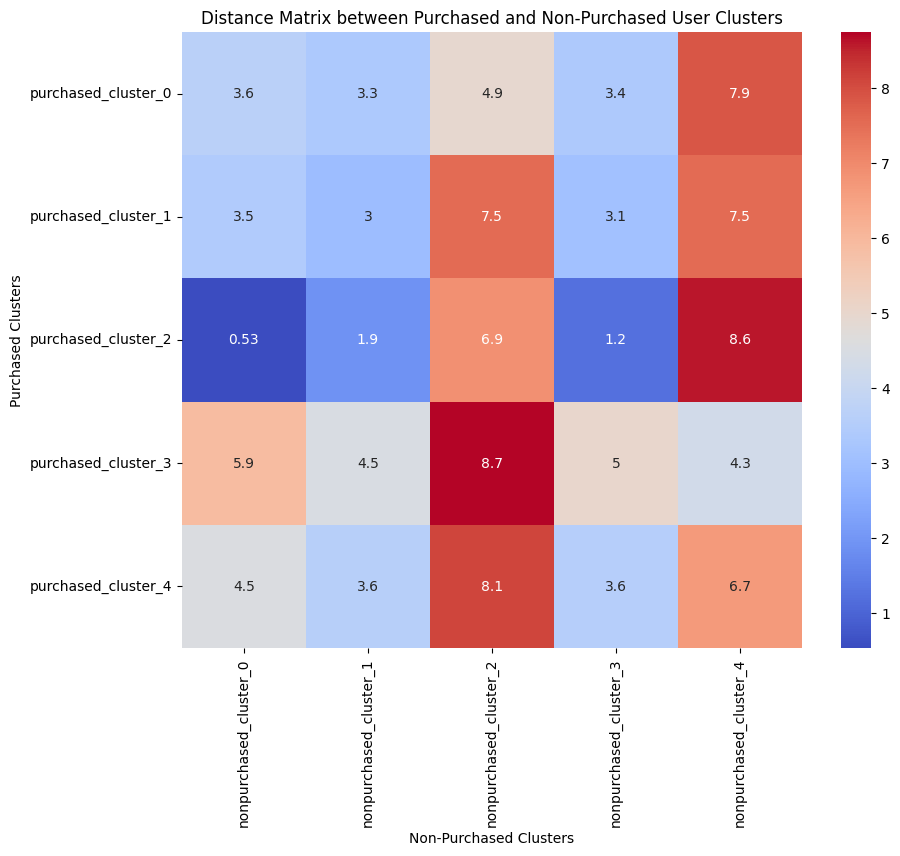

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, annot=True, cmap='coolwarm')
plt.title('Distance Matrix between Purchased and Non-Purchased User Clusters')
plt.xlabel('Non-Purchased Clusters')
plt.ylabel('Purchased Clusters')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Standardizing features for purchased users
scaler = StandardScaler()
purchased_cluster_means_std = pd.DataFrame(scaler.fit_transform(purchased_cluster_means),
                                           columns=purchased_cluster_means.columns,
                                           index=purchased_cluster_means.index)

# Standardizing features for non-purchased users
nonpurchased_cluster_means_std = pd.DataFrame(scaler.transform(nonpurchased_cluster_means),
                                              columns=nonpurchased_cluster_means.columns,
                                              index=nonpurchased_cluster_means.index)

# Calculate the distance matrix between clusters of purchased and non-purchased users
distance_matrix = cdist(purchased_cluster_means_std, nonpurchased_cluster_means_std, metric='euclidean')

# Convert the distance matrix to a DataFrame for better readability
distance_df = pd.DataFrame(distance_matrix,
                           index=[f'purchased_cluster_{i}' for i in range(len(purchased_cluster_means))],
                           columns=[f'nonpurchased_cluster_{i}' for i in range(len(nonpurchased_cluster_means))])

# Find the closest clusters by distance
closest_clusters = distance_df.idxmin(axis=1)
closest_clusters_distances = distance_df.min(axis=1)

# Combine closest clusters with their distances
closest_clusters_df = pd.DataFrame({
    'closest_nonpurchased_cluster': closest_clusters,
    'distance': closest_clusters_distances
})


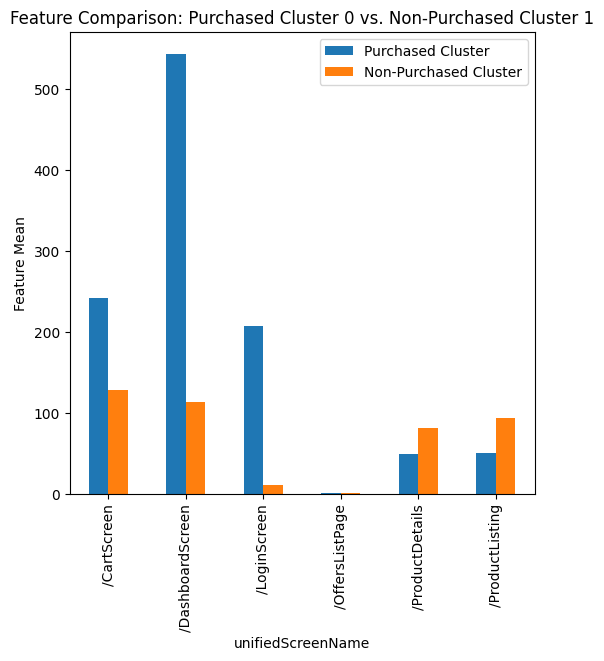

In [ ]:
# Example cluster index
purchased_cluster_index = 0

# Get the closest non-purchased cluster index
nonpurchased_cluster_index = int(closest_clusters_df.loc[f'purchased_cluster_{purchased_cluster_index}', 'closest_nonpurchased_cluster'].split('_')[-1])

# Bar plot for the selected pair of clusters
purchased_means = purchased_cluster_means.iloc[purchased_cluster_index]
nonpurchased_means = nonpurchased_cluster_means.iloc[nonpurchased_cluster_index]

comparison_df = pd.DataFrame({
    'Purchased Cluster': purchased_means,
    'Non-Purchased Cluster': nonpurchased_means
})

comparison_df.plot(kind='bar', figsize=(6, 6))
plt.title(f'Feature Comparison: Purchased Cluster {purchased_cluster_index} vs. Non-Purchased Cluster {nonpurchased_cluster_index}')
plt.ylabel('Feature Mean')
plt.show()


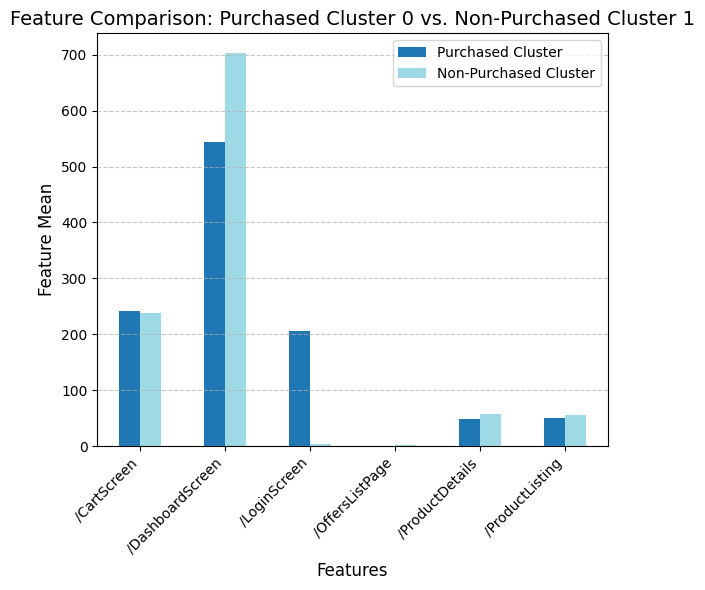

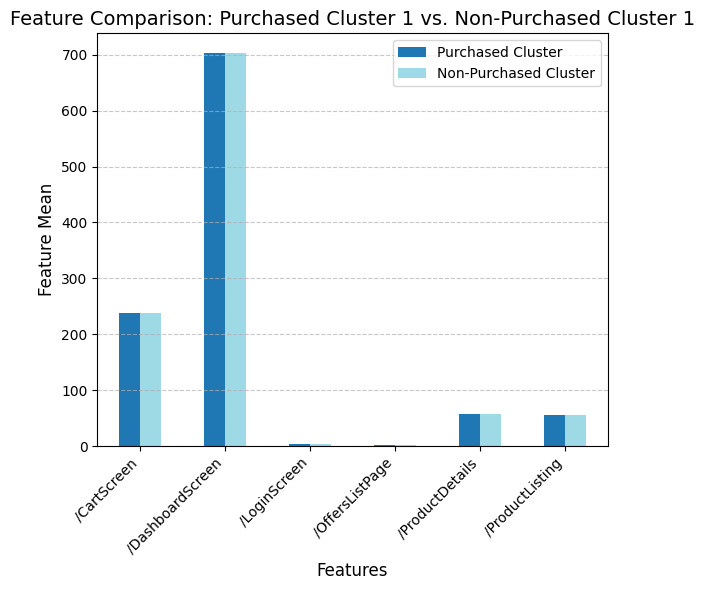

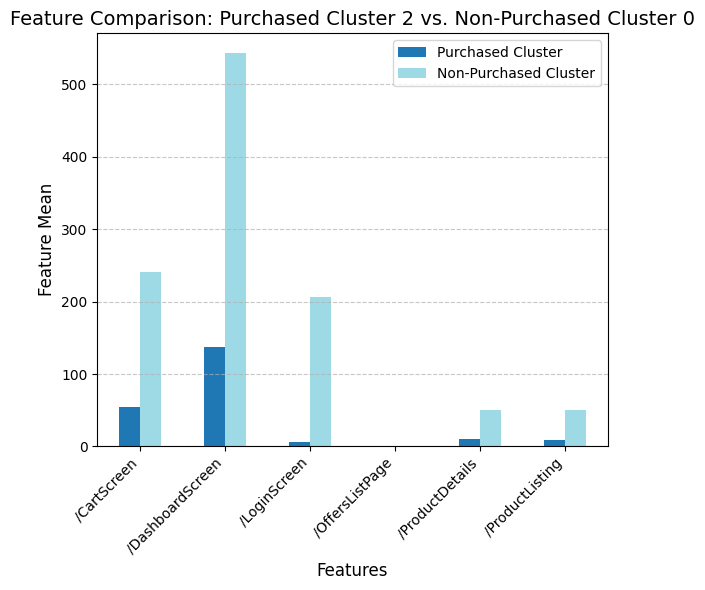

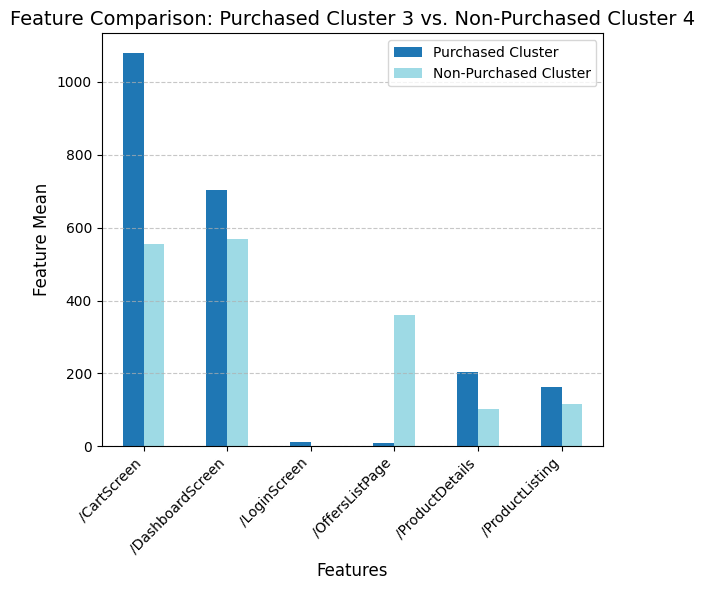

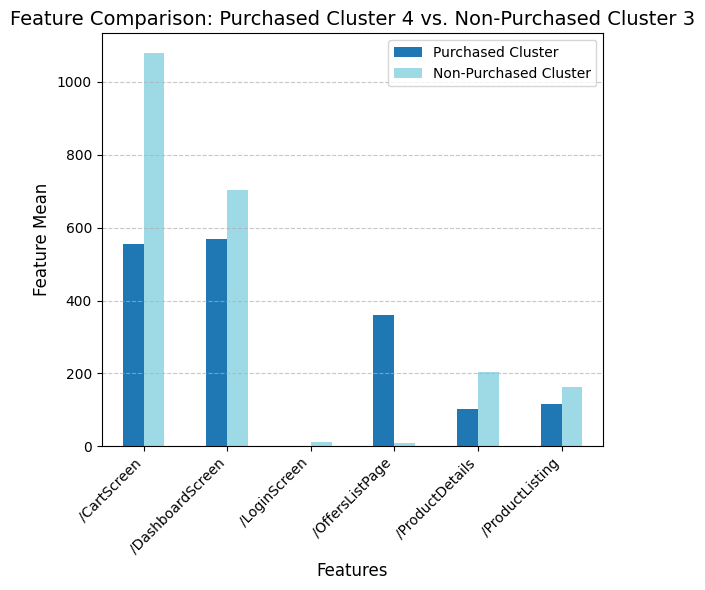

In [ ]:
for purchased_cluster_index in range(0,5):
    try:
        # Get the closest non-purchased cluster index (handle potential exceptions)
        nonpurchased_cluster_index = int(closest_clusters_df.loc[f'purchased_cluster_{purchased_cluster_index}', 'closest_nonpurchased_cluster'].split('_')[-1])

        purchased_means = purchased_cluster_means.iloc[purchased_cluster_index]
        nonpurchased_means = purchased_cluster_means.iloc[nonpurchased_cluster_index]

        comparison_df = pd.DataFrame({
            'Purchased Cluster': purchased_means,
            'Non-Purchased Cluster': nonpurchased_means
        })

        # Create the bar plot with improved formatting and clarity
        comparison_df.plot(kind='bar', figsize=(6, 6), colormap='tab20', style='--')
        plt.title(f'Feature Comparison: Purchased Cluster {purchased_cluster_index} vs. Non-Purchased Cluster {nonpurchased_cluster_index}', fontsize=14)
        plt.ylabel('Feature Mean', fontsize=12)
        plt.xlabel('Features', fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
        plt.tight_layout()  # Improve layout for better visualization

        plt.show()

    except KeyError:
        print(f"Warning: No data found for purchased_cluster_{purchased_cluster_index}")